In [1]:
import pandas as pd

In [2]:
import numpy as np
import sklearn as sk

In [3]:
from sklearn import datasets
from matplotlib import pylab as plt

In [4]:
from matplotlib.colors import ListedColormap

In [5]:
colors = ListedColormap(['red', 'green'])

In [6]:
class_data = datasets.make_classification(n_features = 4, n_informative = 3, 
                                                  n_redundant = 1, n_clusters_per_class = 4,
                                                            random_state = 1 )

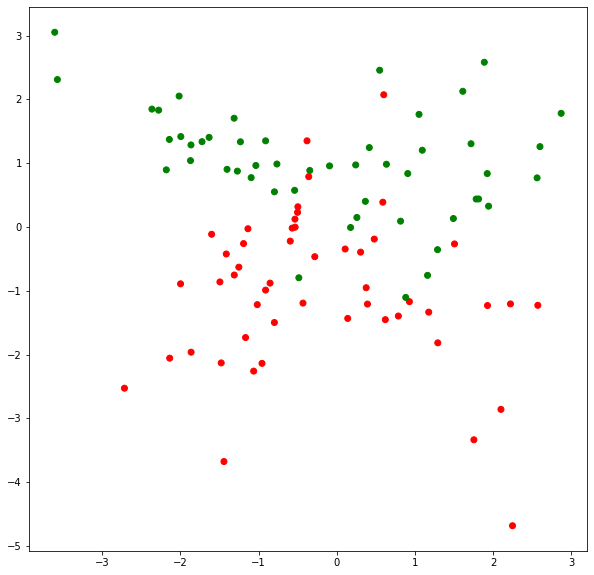

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(list(map(lambda x: x[2], class_data[0])), list(map(lambda x: x[1], class_data[0])), c = class_data[1], cmap = colors)

In [8]:
class_data

(array([[ 1.84761723e+00, -1.89677077e-01,  4.79646613e-01,
          1.88948174e+00],
        [-4.79269044e-01, -2.89409654e-03, -5.32464697e-01,
         -9.11973547e-01],
        [ 1.18966850e-01,  1.32473429e-01,  1.49136960e+00,
          1.61390050e+00],
        [ 1.81386350e+00,  4.38156634e-01,  1.78287634e+00,
          3.40423447e+00],
        [ 1.11059049e+00, -1.43337896e+00,  1.40130544e-01,
          4.33454727e-01],
        [-1.06693967e-01,  1.84756203e+00, -2.36466452e+00,
         -1.62363042e+00],
        [ 6.19992926e-01, -6.29657169e-01, -1.25301912e+00,
         -9.90517916e-01],
        [-2.86764816e+00, -1.14140976e-01, -1.60109567e+00,
         -3.94456339e+00],
        [-9.37855223e-02,  3.05198745e+00, -3.60790980e+00,
         -2.32286011e+00],
        [-5.16067302e-01, -3.45595625e-01,  1.07090036e-01,
         -4.59837385e-01],
        [-1.32370128e+00,  9.83328302e-01,  6.35088892e-01,
         -3.68055404e-02],
        [-5.92325378e-01,  7.88406399e-01, 

In [9]:
regr_data = datasets.make_regression(n_features=3)

In [10]:
type(regr_data)

tuple

In [11]:
from pprint import pprint

In [12]:
pprint(regr_data)

(array([[-4.93070684e-01,  1.68964291e+00,  1.15788112e+00],
       [-5.89052397e-01,  4.85696821e-04, -1.60475611e-01],
       [-2.82452053e-01, -1.34282090e+00,  2.53891527e-02],
       [-1.82085238e+00,  2.64557133e-01,  7.81498716e-01],
       [ 1.79080720e+00, -1.11683084e+00, -1.16448818e-01],
       [ 5.70821800e-01, -2.29752297e-01,  1.01080563e+00],
       [ 3.89454405e-01,  1.74146002e-01,  5.09425115e-01],
       [-4.66277221e-01,  1.29715218e+00, -4.42528562e-01],
       [-1.67639785e-01, -3.64048479e-01, -2.88726412e-01],
       [-6.03961092e-01, -5.06343804e-01, -3.48829067e-01],
       [-1.38479999e-01, -5.81901208e-01, -6.89458620e-01],
       [ 2.92262884e-01,  5.25072996e-01, -2.00581174e-03],
       [ 1.43596325e+00, -3.88954872e-01,  5.84479992e-01],
       [ 3.41196566e-01, -4.06643206e-01,  9.84660465e-01],
       [-1.07232625e+00,  1.24269545e+00, -1.46926597e+00],
       [-1.07728460e+00,  1.64864479e+00, -1.01545142e+00],
       [-7.84471603e-01,  8.13393442e-0

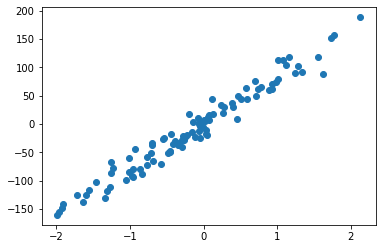

In [13]:
plt.figure()
plt.scatter(list(map(lambda x: x[2],regr_data[0])),regr_data[1])

In [14]:
def MSE(y_pred,Y,n_population):
  return 1/n_population * np.sum(np.subtract(y_pred,Y) ** 2)

In [15]:
def MSE_differential_evolution(X, Y, n_population=400, n_generations=1e4, mutation_force=100, probability=0.8):
  """here you can do any optimization technique you want. I try differential evolution"""
  
  #initialize population
  w_population=[]
  for k in range(n_population): 
    w_population.append(10*np.random.randint(-100, 100)*np.random.sample(size=(1,4)))
  w_populations=[]
  n_step=0

  while n_step < n_generations:
    w_populations.append(w_population)

  #choose 3 vectors, mutate first one in the direction of (second - third), compare with first 
    w_index = np.random.randint(0, n_population, size=(1,3))
    w1 = np.array(w_population[w_index[0][0]]) 
    w2 = np.array(w_population[w_index[0][1]])
    w3 = np.array(w_population[w_index[0][2]])

    w_mutant = np.add(w1, (mutation_force * np.subtract(w2,w3)))
    
    w_desc = []
    for k in range(4):
      proba = np.random.uniform()
      if proba<=probability:
        w_desc.append(w_mutant[0][k])
      else:
        w_desc.append(w1[0][k])
        
    w_desc=np.array([w_desc])

    Y_pred = np.sum(X * w1, axis = 1)
    Y_pred_mutant = np.sum(X * w_desc, axis = 1)
    error_1 = MSE(Y_pred,Y,n_population)
    error_2 = MSE(Y_pred_mutant,Y,n_population)
    if error_2 < error_1:
      w_population.pop(w_index[0][0])
      w_population.insert(w_index[0][0],w_desc)
    n_step+=1
  
  w_best = np.mean(np.array(w_population),axis=0)
  Y_predicted = np.sum(X * w_best, axis = 1)

  return w_best, Y_predicted, w_populations



In [16]:
def evolution_plot():
  pass

In [17]:
def regr_model(X,Y):

  """Simplest model that takes two pandas dataframes as input"""
  
  features = X.keys()
  X_train = X.loc[:, list(features)].values
  Y_train = Y.values
  means, stds = np.mean(X_train,axis=0), np.std(X_train, axis=0)
  X_train = (X_train - means) / stds
  X_train = np.hstack((X_train, np.ones(X.shape[0]).reshape(X.shape[0], 1))) #add one more column
  w, predictions, w_stats = MSE_differential_evolution(X_train, Y_train)
  print(w)
  print(predictions)

  return w, w_stats, predictions

In [18]:
X_data=pd.DataFrame(regr_data[0])

In [19]:
X_data.head()

,0,1,2
0,-0.493071,1.689643,1.157881
1,-0.589052,0.000486,-0.160476
2,-0.282452,-1.342821,0.025389
3,-1.820852,0.264557,0.781499
4,1.790807,-1.116831,-0.116449


In [20]:
Y_data=pd.DataFrame(regr_data[1])

In [21]:
Y_data.head()

,0
0,118.364466
1,-13.908995
2,-18.018440
3,64.915954
4,-23.282751


In [22]:
best_w,stats,predictions = regr_model(X_data,Y_data)

[[-28.79372169   7.28468738  -9.97636864  -0.86311858]]
[ 1.21925580e+01  1.71595503e+01 -3.09032758e+00  4.34397943e+01
 -5.82375125e+01 -2.98510132e+01 -1.64067780e+01  2.60472350e+01
  4.09718394e+00  1.60044431e+01  6.07993095e+00 -5.59922012e+00
 -5.06807970e+01 -2.43735513e+01  5.38740835e+01  5.19780354e+01
  2.59445223e+01  5.11511461e+00  2.26653262e+01  3.04554130e+01
  1.85567023e+01 -2.47721881e-02 -1.93900481e+01 -4.35505672e+01
 -7.37425774e+00 -1.84419529e+01 -8.46130374e+00 -2.96030195e+01
 -2.57415966e+01  3.73049356e+00  7.22418000e+00  4.91175552e+01
 -1.23147745e+01  7.15374477e-01 -2.82354528e+01 -7.02876409e+01
  2.18669680e+01 -8.70411897e+01 -3.34449141e+00  2.34555682e+01
 -3.17993081e+01  4.66108706e+00  1.07998372e+01  5.83302146e+01
 -7.68508773e+01 -4.90021792e+00 -2.92070370e+01  2.43495871e+01
 -1.93315968e+01 -3.29502527e+01 -1.81046835e+01  2.42120301e+01
  9.04039730e-02  2.37511161e+01  4.47974755e+01  5.81888067e+01
 -1.31917342e+01  2.32243054e+01 -

In [23]:
from sklearn import metrics 
metrics.mean_squared_error(Y_data, predictions)

8326.83641966918

In [24]:
from sklearn import model_selection

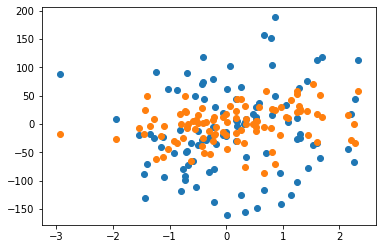

In [25]:
plt.scatter(X_data[1],Y_data)
plt.scatter(X_data[1], predictions)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression().fit(X_data, Y_data)

In [28]:
reg.coef_

array([[ 1.43543935, 14.65639718, 81.44891533]])

In [29]:
reg.intercept_

array([0.])